
# Bibliotecas 

In [1]:
import tensorflow as tf
from numpy.random import RandomState
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import manifold, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from matplotlib import ticker

In [39]:

## carrega a base de dados do MNIST
#mnist = tf.keras.datasets.mnist.load_data()
#fmnist = tf.keras.datasets.fashion_mnist.load_data()
cifar10 = tf.keras.datasets.cifar10.load_data()

## extrai as imagens e rótulos da base de treinamento
#(train_images, train_labels), _ = mnist
#(train_images, train_labels), _ =  fmnist
(train_images, train_labels), _ =  cifar10


# cria uma lista para armazenar as imagens e rótulos dos dígitos 0 e 3
images = []
labels = []

n_samples = 200 #temos 200 amostras
rng = RandomState(0)

def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())

#função que plota um gráfico 2d
def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


# percorre todas as imagens e rótulos da base de treinamento
for i in range(train_images.shape[0]):
    # verifica se o rótulo é 0 ou 3
    if train_labels[i] == 0 or train_labels[i] == 3:
        # adiciona a imagem e rótulo à lista
        images.append(train_images[i])
        labels.append(train_labels[i])
    # para o loop se já foram coletadas 200 amostras de imagens
    if len(images) == 200:
        break

# converte as listas em arrays numpy
images = np.array(images)
labels = np.array(labels)

# imprime o número de amostras de imagens e seus rótulos
print("Número de amostras de imagens: {}".format(images.shape[0]))
print("Rótulos: {}".format(np.unique(labels)))

#Precisamos converter o vetor de imagens em um vetor de pontos
images_vetor = images.reshape(images.shape[0],-1)

Número de amostras de imagens: 200
Rótulos: [0 3]


## PCA

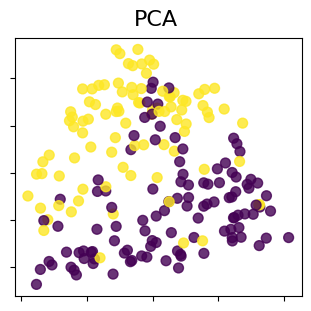

In [9]:
# técnica PCA para redução de dimensionalidade

# Precisamos converter o vetor de imagens em um um vetor de pontos 

pca = PCA(n_components=2)
Y_pca = pca.fit_transform(images_vetor)
S_color = labels;

plot_2d(Y_pca, S_color, "PCA")


## MDS

c:\Users\plini\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


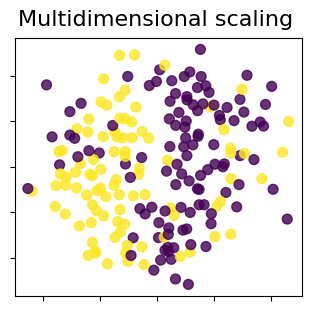

In [8]:
# técnica MDS para redução de dimensionalidade

md_scaling = manifold.MDS(
    n_components=2, max_iter=50, n_init=4, random_state=rng
)
S_scaling = md_scaling.fit_transform(images_vetor)

plot_2d(S_scaling, labels, "Multidimensional scaling")

PERCEPTRON

Acurácia do modelo: 0.00%


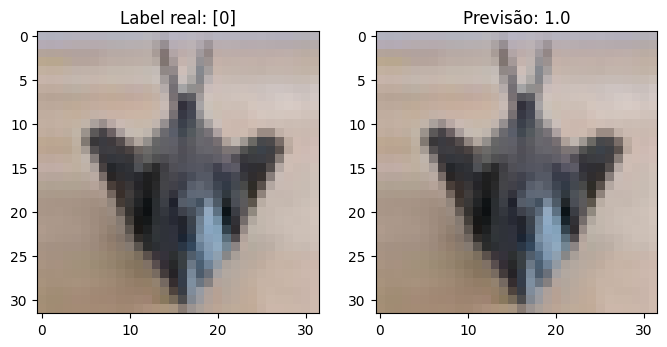

In [46]:
'''
# Gere exemplos aleatórios linearmente separáveis (substitua isso pelos seus dados reais)
X = np.array(images_vetor)
y = np.array(labels)

# Passo 1: Divida os dados em 80% para treinamento e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 2: Crie um modelo de Perceptron
perceptron = Perceptron(max_iter=100, random_state=42)

# Passo 2: Treine o modelo usando o conjunto de treinamento
perceptron.fit(X_train, y_train)

# Passo 3: Faça previsões no conjunto de teste
y_pred = perceptron.predict(X_test)

# Passo 3: Calcule a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')'''
###########################################################



x = np.array(images_vetor)
y = np.array(labels)

# Divida os dados em 80% para treinamento e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Implemente o algoritmo do Perceptron para classificação
class Perceptron:
    def __init__(self, learning_rate=0.01, max_epochs=1000):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0
        for _ in range(self.max_epochs):
            for i in range(X.shape[0]):
                if y[i] * (np.dot(X[i], self.w) + self.b) <= 0:
                    self.w += self.learning_rate * y[i] * X[i]
                    self.b += self.learning_rate * y[i]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# Crie e treine o modelo Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Calcule a acurácia no conjunto de teste
y_pred = perceptron.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

# Plote um exemplo de imagem e a previsão do Perceptron


dimensao = 28
cores = 1
#para o caso do cifar10
if len(X_test[0]) == 3072:
    dimensao = 32
    cores = 3

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)

plt.imshow(X_test[0].reshape(dimensao, dimensao, cores), cmap='gray')
plt.title(f'Label real: {y_test[0]}')

plt.subplot(1, 2, 2)
plt.imshow(X_test[0].reshape(dimensao, dimensao, cores), cmap='gray')
plt.title(f'Previsão: {y_pred[0]}')

plt.show()


